In [1]:
%%capture
from tqdm.notebook import tqdm

In [2]:
import tensorflow as tf

In [3]:
import IPython.display as ipd
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import glob
import random
from scipy import misc
import librosa.display
from ipywidgets import IntProgress

# Noise preparation

In [4]:
noise_files = [ f for f in glob.glob("train/audio/_background_noise_/*.wav")]

In [5]:
noise = np.array([librosa.load(i) for i in noise_files])

<ipython-input-5-94d14368daa2>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  noise = np.array([librosa.load(i) for i in noise_files])


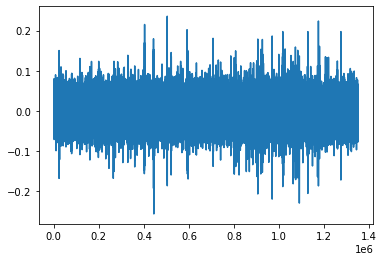

In [6]:
plt.plot(noise[2][0])

In [7]:
norm_noise = np.array([noise[i][0] / max(noise[i][0]) for i in range(len(noise))])

<ipython-input-7-15c765eb4e63>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  norm_noise = np.array([noise[i][0] / max(noise[i][0]) for i in range(len(noise))])


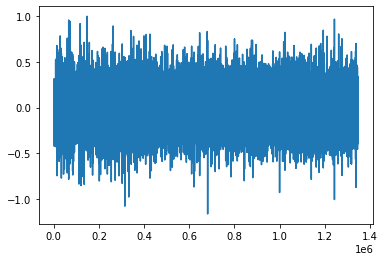

In [8]:
plt.plot(norm_noise[5])

# Load audio

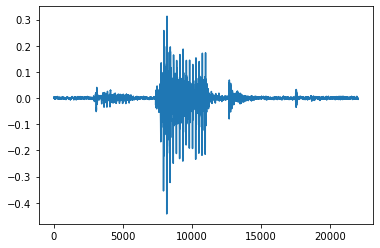

In [11]:
audio, sr = librosa.load('train/audio/bed/5d9bb361_nohash_1.wav')
plt.plot(audio)

In [12]:
ipd.Audio(audio, rate=sr) 

In [13]:
print(len(audio))
print(sr)

22050
22050


## Add noise

In [14]:
r1 = random.randint(0,5)
r2 = random.random()/2.5
r3 = random.random()*.9
len_noise = len(norm_noise[r1])
audio = audio/max(audio)

audio += norm_noise[r1][int(len_noise*r3):int(len_noise*r3)+len(audio)]*r2

ipd.Audio(norm_noise[r1], rate=noise[r1][1]) 

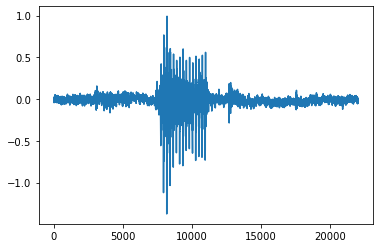

In [15]:
plt.plot(audio)

In [16]:
ipd.Audio(audio, rate=sr)

# Prepare Spectrograms 

In [14]:
dirs = ["down", "left", "right", "up"]

In [22]:
file = [ f for f in glob.glob("train/audio/down/*.wav" )][0]

(44, 44)


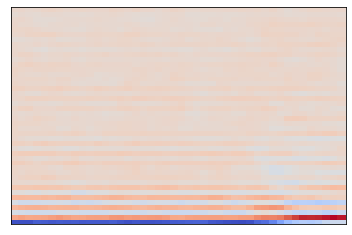

In [28]:
audio, sr = librosa.load(file)
if len(audio) == 22050 and max(audio)> .1:
    r1 = random.randint(0,5)
    r2 = random.random()/2.5
    r3 = random.random()*.9
    len_noise = len(norm_noise[r1])
    audio = audio/max(audio)

    audio += norm_noise[r1][int(len_noise*r3):int(len_noise*r3)+len(audio)]*r2

    m=librosa.feature.mfcc(y=audio,sr=sr,n_mfcc=44)
    #f, t, sp = signal.spectrogram(audio,sr,nperseg=500)
    #print(np.shape(sp[:][:50]))
    #plt.imshow(sp[:][:50])
    #plt.show(
    librosa.display.specshow(m)
    print(m.shape)
    plt.show()

In [9]:
size =(44,44)

Working with: ./clean_data/down.dat


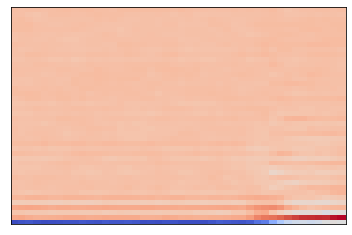

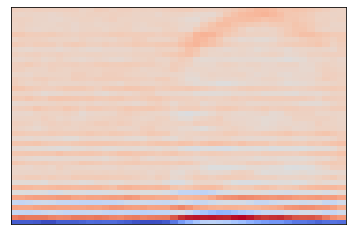

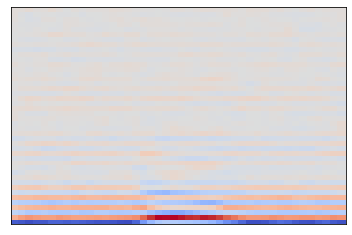

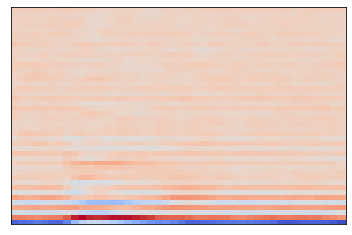


goods_counter: 1870
Working with: ./clean_data/left.dat


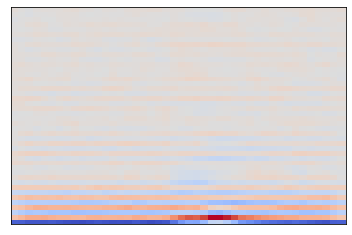

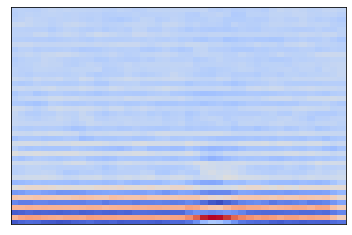

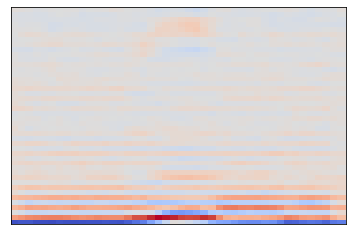

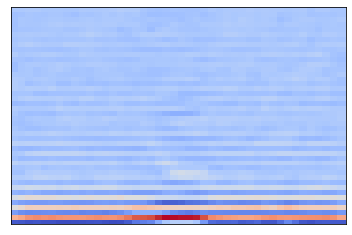


goods_counter: 1914
Working with: ./clean_data/right.dat


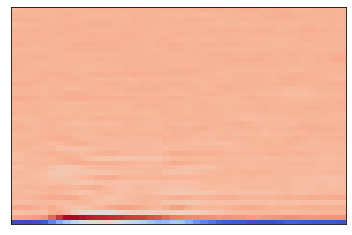

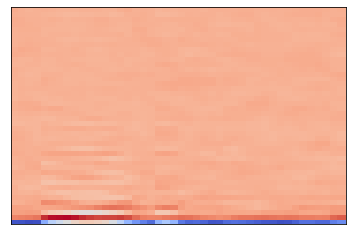

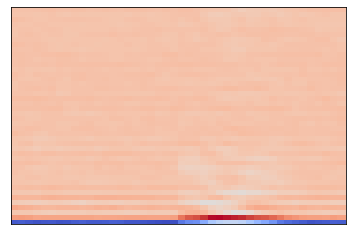

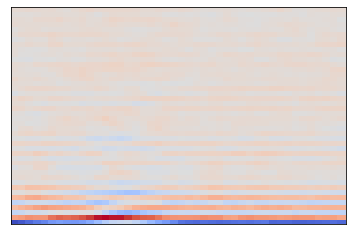


goods_counter: 1885
Working with: ./clean_data/up.dat


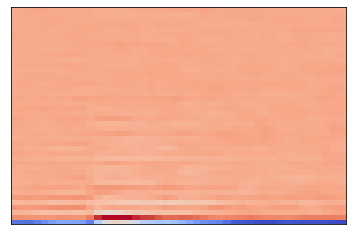

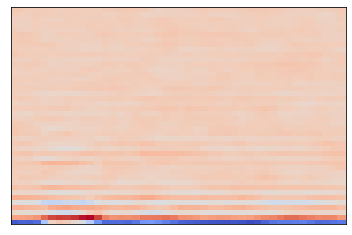

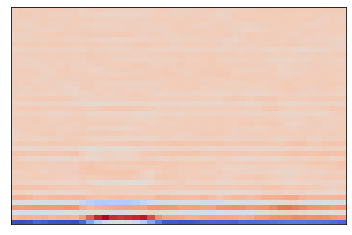

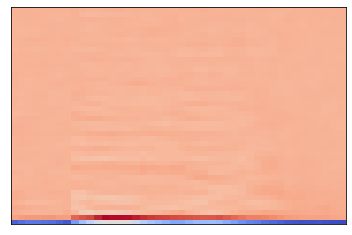


goods_counter: 1838


In [31]:
for i in dirs:
    
    print('Working with: ./clean_data/{}.dat'.format(i))
    #print(i)
    #Find directions
    files = [ f for f in glob.glob("train/audio/{}/*.wav".format(i))]
    #print(files)
    
    
    #Output file
    fp = np.memmap('./clean_data/{}.dat'.format(i), dtype='float32', mode='w+', shape=(len(files),size[0], size[1]))
    
    
    goods_counter = 0
    
    #Process each audio
    for k in tqdm(range(len(files))):
        audio, sr = librosa.load(files[k])
        if len(audio) == 22050 and max(audio)> .1:
            r1 = random.randint(0,5)
            r2 = random.random()/2.5
            r3 = random.random()*.9
            len_noise = len(norm_noise[r1])
            audio = audio/max(audio)

            audio += norm_noise[r1][int(len_noise*r3):int(len_noise*r3)+len(audio)]*r2

            m=librosa.feature.mfcc(y=audio,sr=sr,n_mfcc=44)
            #f, t, sp = signal.spectrogram(audio,sr,nperseg=500)
            #print(np.shape(sp[:][:50]))
            #plt.imshow(sp[:][:50])
            #plt.show()
            fp[goods_counter] = m
            if goods_counter % 600 == 0:
                librosa.display.specshow(m)
                plt.show()
            goods_counter += 1
    print("goods_counter: {}".format(goods_counter))
   

In [4]:
from sklearn.utils import shuffle


In [5]:
files = [ f for f in glob.glob("train/audio/left/*.wav")]

In [10]:
fp = np.memmap('./clean_data/left.dat', dtype='float32', mode='r', shape=(len(files),size[0], size[1]))

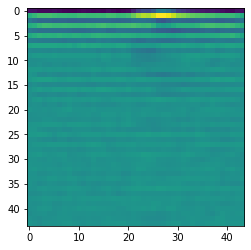

In [15]:
for i in range(1):
    plt.imshow(fp[i])
    plt.show()

In [16]:
ipd.Audio(files[0]) 

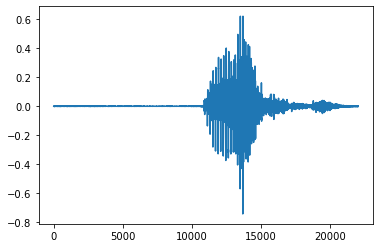

In [17]:
audio, sr = librosa.load(files[0])
plt.plot(audio)

In [11]:
training_inputs = []

In [15]:
for i,j in zip(dirs,range(len(dirs))):
    files = [ f for f in glob.glob("train/audio/{}/*.wav".format(i))]
    fp = np.memmap('./clean_data/{}.dat'.format(i), dtype='float32', mode='r', shape=(len(files),size[0], size[1]))
    training_inputs.append(fp[:1000])

In [16]:
np.shape(training_inputs)

(4, 1000, 44, 44)

In [17]:
training_inputs=np.reshape(training_inputs,(1000*4,size[0],size[1],1))

In [77]:
np.max((training_inputs+650)/950)

1.0006914

In [54]:
np.shape(training_outputs)

(4000,)

In [33]:
import scipy.io 


In [34]:
scipy.io.savemat('/root/Descargas/voice_recognition/matlab/data_audio.mat',
                        mdict={
                              'X': np.reshape(training_inputs,(4000,44**2)),
                              'y_dash': np.reshape(training_outputs,(4000,1)),
                         })

In [69]:
44**2

1936

In [18]:
ts=1000
training_outputs = np.array([0]*ts+[1]*ts+[2]*ts+[3]*ts)
training_inputs, training_outputs = shuffle(training_inputs, training_outputs)

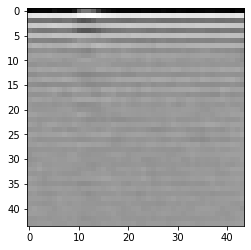

In [19]:
plt.imshow(np.reshape(255-((training_inputs[0]+650)/950),(size[0],size[1])),cmap="Greys")

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=(5,5), activation=tf.nn.relu, input_shape=(size[0],size[1],1)),#40 filtros(3,3)
    #tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=3),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3,3), activation=tf.nn.relu),#40 filtros(3,3)
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=4, activation=tf.nn.softmax)
])

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 40, 40, 10)        260       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 38, 38, 10)        910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3610)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               462208    
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 516       
Total params: 463,894
Trainable params: 463,894
Non-trainable params: 0
________________________________________________

In [40]:
(3+   7+   1+   4+   3+3+   7+   7+   2+   3+6+   6+   5+   10+  8+2+   3+   5+   5+   6+7+   6+   6+   3+   7+2+   2+   10+  9+   6+6+   9+   4+   7+   5+5+   7+   8+   6)/(40*20)

0.26375

In [41]:
83 * 40/60

55.333333333333336

In [42]:
model.compile(optimizer=tf.keras.optimizers.Adam(
                learning_rate=0.002, beta_1=0.9, beta_2=0.999),
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [43]:
batch_size = 100

In [44]:
model.fit(training_inputs[:4000],training_outputs[:4000], epochs=5,validation_data=(training_inputs[-500:],training_outputs[-500:]),)

Epoch 1/5
125/125 [==============================] - 10s 73ms/step - loss: 5.4631 - accuracy: 0.3306 - val_loss: 0.8107 - val_accuracy: 0.6960
Epoch 2/5
125/125 [==============================] - 9s 68ms/step - loss: 0.7035 - accuracy: 0.7384 - val_loss: 0.2959 - val_accuracy: 0.9100
Epoch 3/5
125/125 [==============================] - 8s 68ms/step - loss: 0.3060 - accuracy: 0.8921 - val_loss: 0.1203 - val_accuracy: 0.9680
Epoch 4/5
125/125 [==============================] - 7s 56ms/step - loss: 0.1137 - accuracy: 0.9698 - val_loss: 0.1307 - val_accuracy: 0.9600
Epoch 5/5
125/125 [==============================] - 7s 59ms/step - loss: 0.0862 - accuracy: 0.9755 - val_loss: 0.0247 - val_accuracy: 0.9920


In [47]:
model.fit(training_inputs,training_outputs, epochs=5)

Epoch 1/5
125/125 [==============================] - 2s 15ms/step - loss: 1.5054 - accuracy: 0.4640
Epoch 2/5
125/125 [==============================] - 2s 14ms/step - loss: 0.6061 - accuracy: 0.7728
Epoch 3/5
125/125 [==============================] - 2s 15ms/step - loss: 0.3402 - accuracy: 0.8755
Epoch 4/5
125/125 [==============================] - 2s 15ms/step - loss: 0.2261 - accuracy: 0.9155
Epoch 5/5
125/125 [==============================] - 2s 15ms/step - loss: 0.1777 - accuracy: 0.9365


In [4]:
audio, sr = librosa.load('asd.wav')

In [ ]:
f, t, sp = signal.spectrogram(audio*10,44100,nperseg=100)

plt.pcolormesh(sp[:][:])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [147]:
audio, sr = librosa.load(files[0])

In [22]:
model.save('./model_words_recognizer')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./model_words_recognizer/assets
